<a href="https://colab.research.google.com/github/S-M-Abrar-Hossain-Asif/Supply-chain-Delay-Risk-predictor/blob/main/ML_final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv
User uploaded file "DataCoSupplyChainDataset.csv" with length 96189115 bytes


In [ ]:
#Loading data
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='cp1252')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02/03/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.shape

(180519, 53)

In [ ]:
#2. Data Preprocessing

In [ ]:
# 1. Dropping unnecessary columns to check high cardinality, noise etc.
drop_cols = [
    "Customer Email","Customer Password","Customer Fname","Customer Lname","Customer Street",
    "Customer Id","Order Id","Order Customer Id","Order Item Id","Order Item Cardprod Id",
    "Product Card Id","Category Id","Department Id","Product Category Id",
    "shipping date (DateOrders)","Days for shipping (real)","Delivery Status","Order Status",
    "Customer Zipcode","Customer City","Order City","Product Image","Product Description",
    "Latitude","Longitude","Customer Country",
    "Type","Department Name","Category Name","Order Zipcode"]

df = df.drop(columns=drop_cols)
df.shape

(180519, 23)

In [ ]:
df.columns

Index(['Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Late_delivery_risk', 'Customer Segment',
       'Customer State', 'Market', 'Order Country', 'order date (DateOrders)',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Product Name',
       'Product Price', 'Product Status', 'Shipping Mode'],
      dtype='object')

In [ ]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Late_delivery_risk,0
Customer Segment,0
Customer State,0
Market,0
Order Country,0
order date (DateOrders),0
Order Item Discount,0


In [ ]:
# 2.Encoding
# 1) One-hot
df = pd.get_dummies(
    df,
    columns=["Customer Segment", "Shipping Mode", "Market"],
    dtype=int
)

# 2) label
le = LabelEncoder()

df["Customer State"] = le.fit_transform(df["Customer State"])
df["Order State"] = le.fit_transform(df["Order State"])
df["Order Country"] = le.fit_transform(df["Order Country"])
df["Order Region"] = le.fit_transform(df["Order Region"])
df["Product Name"] = le.fit_transform(df["Product Name"])

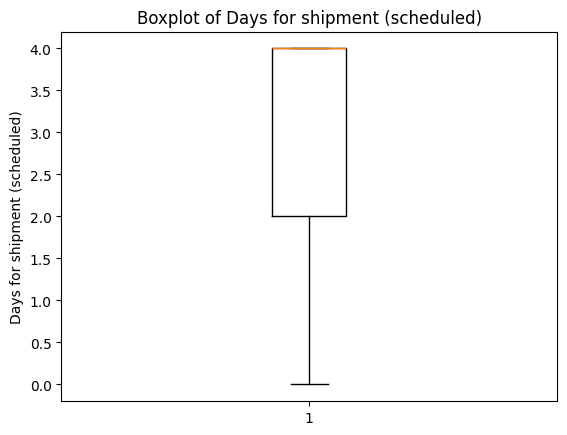

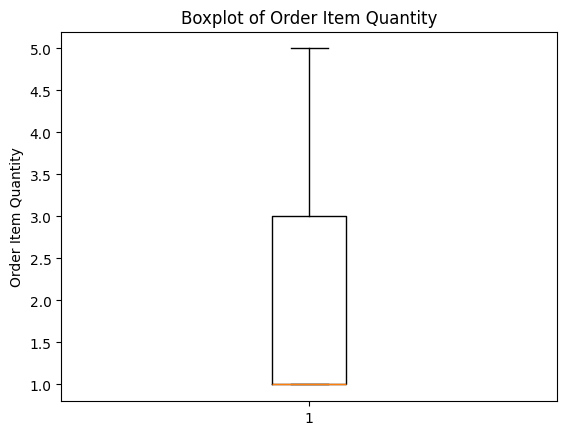

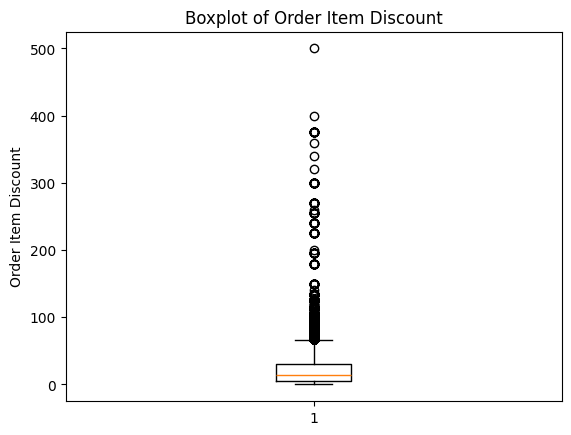

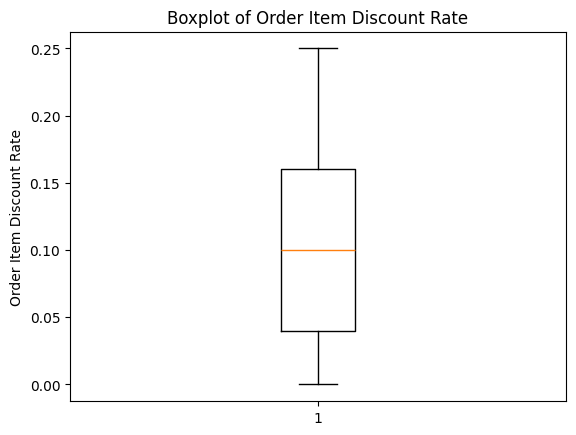

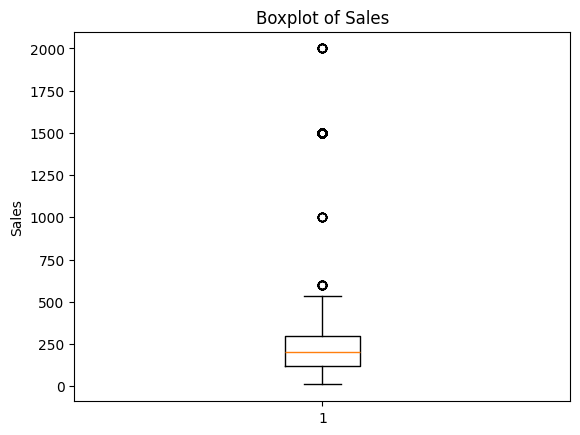

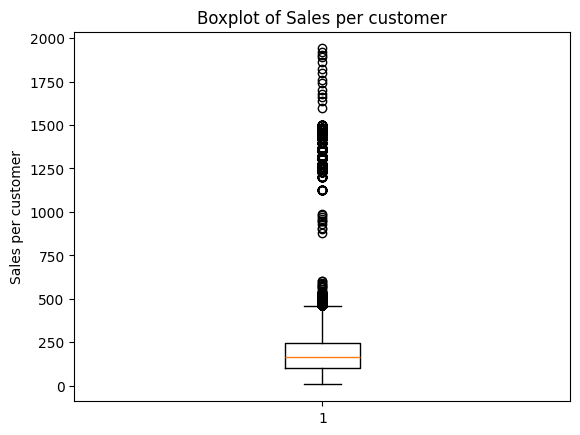

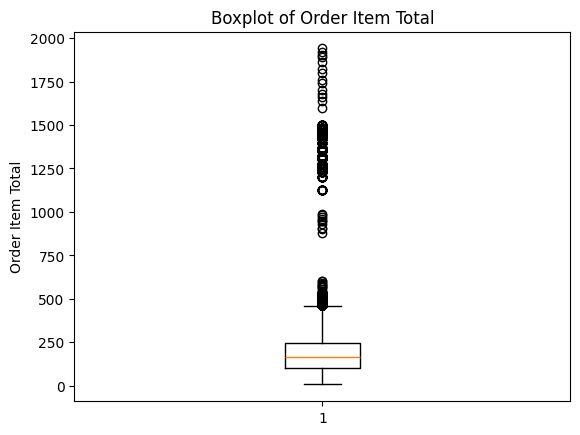

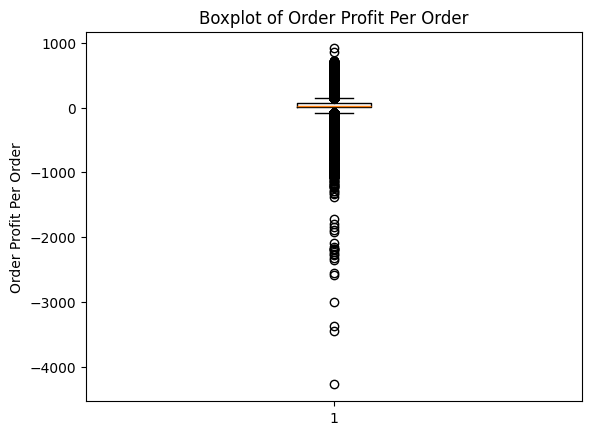

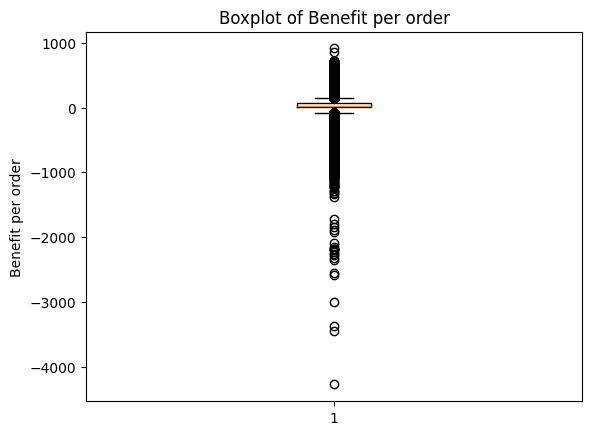

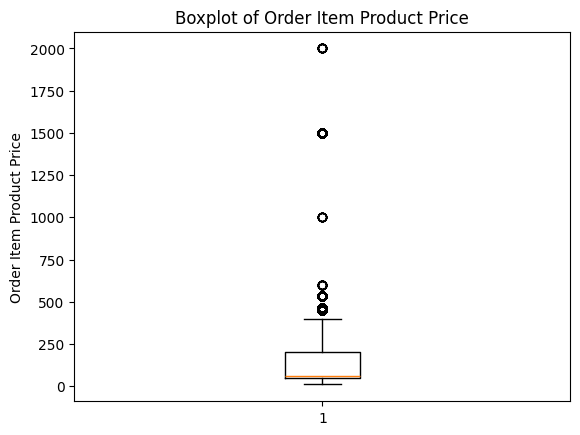

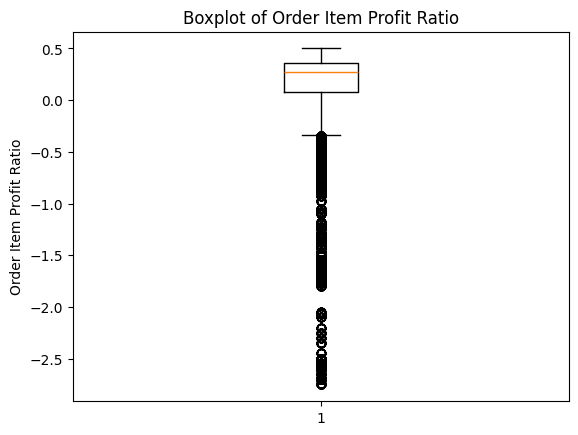

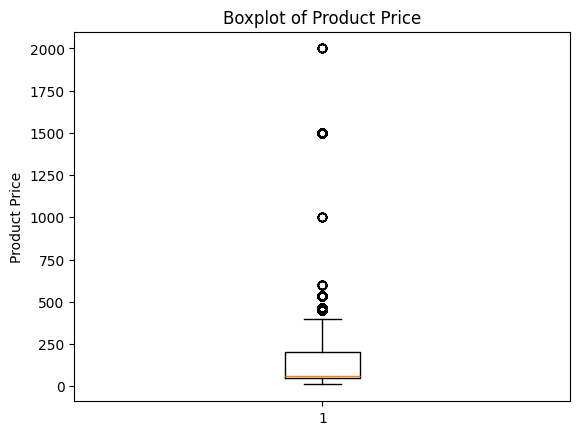

In [ ]:
# 3. Outlier detection and handling
num_cols = [
    "Days for shipment (scheduled)",
    "Order Item Quantity",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Sales",
    "Sales per customer",
    "Order Item Total",
    "Order Profit Per Order",
    "Benefit per order",
    "Order Item Product Price",
    "Order Item Profit Ratio",
    "Product Price"
]

for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
#  Outlier treatment
# REMOVE impossible values
df = df[df["Days for shipment (scheduled)"] > 0].copy()
# CAP extreme values (winsorization):
# Upper-cap
for col in [
    "Order Item Discount",
    "Sales",
    "Sales per customer",
    "Order Item Total"
]:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)
# Both side cap
for col in [
    "Order Profit Per Order",
    "Benefit per order"
]:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower, upper=upper)
# LOG TRANSFORM
df["Sales_log"] = np.log(df["Sales"] + 1)
df["Sales_per_customer_log"] = np.log(df["Sales per customer"] + 1)
df["Order_Item_Total_log"] = np.log(df["Order Item Total"] + 1)

# Profit & Benefit can be negative
df["Order_Profit_log"] = np.log(
    df["Order Profit Per Order"] + 1 - df["Order Profit Per Order"].min()
)

df["Benefit_per_order_log"] = np.log(
    df["Benefit per order"] + 1 - df["Benefit per order"].min()
)

print("Final outlier handling + log transform done.")
print("Dataset shape:", df.shape)

Final outlier handling + log transform done.
Dataset shape: (170782, 37)


In [ ]:
# 4. Feature Engineering
df["order date (DateOrders)"] = pd.to_datetime(
    df["order date (DateOrders)"], errors="coerce"
)

df["Discount_Pressure"] = df["Order Item Discount Rate"] * df["Order Item Quantity"]
df["Profit_Margin"] = df["Order Profit Per Order"] / (df["Order Item Total"] + 1)
df["Value_per_Item"] = df["Order Profit Per Order"] / (df["Order Item Quantity"] + 1)
df["Order_DayOfWeek"] = df["order date (DateOrders)"].dt.weekday
df["Order_IsWeekend"] = df["Order_DayOfWeek"].isin([5,6]).astype(int)
df["Order_Month"] = df["order date (DateOrders)"].dt.month
df = df.drop(columns=["order date (DateOrders)"])


In [ ]:
drop_cols = [
    # replaced by FE
    "Order Item Discount Rate",
    "Order Item Quantity",
    "Order Profit Per Order",
    "Order Item Total",

    # replaced by log features
    "Sales",
    "Sales per customer",
    "Benefit per order",

    # optional (recommended)
    "Order Item Discount"
]

df = df.drop(columns=drop_cols, errors="ignore")

print("Columns dropped after FE.")
print("Current shape:", df.shape)


Columns dropped after FE.
Current shape: (170782, 34)


In [ ]:
#5. Scaling
target = "Late_delivery_risk"
X = df.drop(columns=[target]).copy()
y = df[target].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scale_cols = X_train.select_dtypes(include=["float64", "float32"]).columns.tolist()
scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
print("Scaled columns:", len(scale_cols))
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Scaled columns: 11
Train shape: (136625, 33) Test shape: (34157, 33)


In [ ]:
#3. Pipeline Creation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

num_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numeric_features),
        ("cat", cat_transformer, categorical_features)
    ]
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=100,
            random_state=42
        ))
    ]
)


Random Forest can capture non-linear relationships and feature interactions present in supply chain data and is robust to noise and correlated features. These characteristics make it well-suited for predicting late delivery risk in this dataset.

In [ ]:
# 5. Train the selected model (Random Forest pipeline)
pipe_rf.fit(X_train, y_train)

print("Random Forest model training completed.")


Random Forest model training completed.


In [ ]:
from sklearn.model_selection import cross_val_score

# 6. Cross validation
cv_scores = cross_val_score(
    pipe_rf,
    X_train,
    y_train,
    cv=5,
    scoring="f1"
)

print("Cross-Validation F1-score Mean:", cv_scores.mean())
print("Cross-Validation F1-score Standard Deviation:", cv_scores.std())

Cross-Validation F1-score Mean: 0.6893953728088142
Cross-Validation F1-score Standard Deviation: 0.003091243501959705


In [ ]:
# 7. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}
grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=1,
    verbose=2
)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=  51.3s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=  50.9s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=  50.5s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=  50.6s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=100; total time=  50.4s
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=200; total time= 1.7min
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=200; total time= 1.8min
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=200; total time= 1.7min
[CV] END model__max_depth=None, model__min_samples_split=2, model__n_estimators=200; total time= 1.7min
[CV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Days '
                                                                          'for '
                                                                          'shipment '
                                                                          '(scheduled)',
                                                                          'Customer '
                                                                          'State',
                                                                          'Order '
                                                                          'Country',
                                                                          'Order '
                                                                          'Item '
                                                                          'Product '
                                                                          'Price',
                                                                          'Order '
                                                                          'Item '
                                                                          'Profit '
                                                                          'Ratio',
                                                                          'Order '
                                                                          'Region',
                                                                          'Order '
                                                                          'State',
                                                                          '...
                                                                          'Value_per_Item', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated F1-score:", grid_search.best_score_)


Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-Validated F1-score: 0.6903154184720404


8. Best Model Selection
Based on the hyperparameter tuning results obtained using GridSearchCV, the Random Forest classifier was selected as the final best-performing model. The selection was made by comparing the cross-validated F1-scores of different parameter combinations.

The optimal Random Forest configuration achieved the highest cross-validated F1-score (0.6903), indicating improved balance between precision and recall for the late delivery risk prediction task. This performance was higher than the baseline model and demonstrated consistent results across validation folds.

The final selected model used the following hyperparameters:

n_estimators = 100

max_depth = None

min_samples_split = 5

Given its superior cross-validation performance and robustness, this tuned Random Forest model was chosen as the final model for test set evaluation.

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score
)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6973094826829054

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.79      0.70     15252
           1       0.78      0.63      0.70     18905

    accuracy                           0.70     34157
   macro avg       0.71      0.71      0.70     34157
weighted avg       0.71      0.70      0.70     34157

ROC-AUC Score: 0.7524115341847892

Confusion Matrix:

[[11991  3261]
 [ 7078 11827]]


Overall, the Random Forest model demonstrates stable and reliable performance, with acceptable accuracy and strong discriminatory power as reflected by the ROC-AUC score. These results indicate that the model is suitable for identifying late delivery risks in the supply chain dataset.

In [ ]:
#10. Web Interface with Gradio
import pickle

best_model = grid_search.best_estimator_   # tuned rf pipeline
with open("dataco_pipe_rf.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Saved: dataco_rf_pipeline.pkl")

Saved: dataco_rf_pipeline.pkl


In [ ]:
import gradio as gr
import pandas as pd
import pickle
import numpy as np

# 1. Load the Model
with open("dataco_pipe_rf.pkl", "rb") as f:
  model = pickle.load(f)

# 2. The Logic Function
def predict_late_risk(
    days_scheduled,
    product_status,
    order_item_qty,
    order_item_total,
    order_profit,
    benefit_per_order,
    sales,
    sales_per_customer,
    discount,
    discount_rate,
    product_price,
    order_item_product_price,
    order_item_profit_ratio,
    customer_segment,
    customer_state,
    market,
    order_country,
    order_region,
    order_state,
    product_name,
    shipping_mode,
    order_date
):

    # ---------- RAW BASE ----------
    df = pd.DataFrame([{
        "Days for shipment (scheduled)": days_scheduled,
        "Product Status": product_status,
        "Order Item Quantity": order_item_qty,
        "Order Item Total": order_item_total,
        "Order Profit Per Order": order_profit,
        "Benefit per order": benefit_per_order,
        "Sales": sales,
        "Sales per customer": sales_per_customer,
        "Order Item Discount": discount,
        "Order Item Discount Rate": discount_rate
    }])

    # ---------- FEATURE ENGINEERING ----------
    df["Discount_Pressure"] = discount_rate * order_item_qty
    df["Profit_Margin"] = order_profit / (order_item_total + 1)
    df["Value_per_Item"] = order_profit / (order_item_qty + 1)

    order_date = pd.to_datetime(order_date, errors="coerce")
    df["Order_IsWeekend"] = 1 if order_date.weekday() in [5, 6] else 0

    # ---------- LOG TRANSFORMS ----------
    df["Sales_log"] = np.log(sales + 1)
    df["Sales_per_customer_log"] = np.log(sales_per_customer + 1)
    df["Order_Item_Total_log"] = np.log(order_item_total + 1)

    df["Order_Profit_log"] = np.log(order_profit + 1 - min(order_profit, 0))
    df["Benefit_per_order_log"] = np.log(benefit_per_order + 1 - min(benefit_per_order, 0))

    # ---------- ONE-HOT ENCODING (MANUAL) ----------
    for seg in ["Consumer", "Corporate", "Home Office"]:
        df[f"Customer Segment_{seg}"] = 1 if customer_segment == seg else 0

    for m in ["Africa", "Europe", "LATAM", "Pacific Asia", "USCA"]:
        df[f"Market_{m}"] = 1 if market == m else 0

    for sm in ["Standard Class", "First Class", "Second Class", "Same Day"]:
        df[f"Shipping Mode_{sm}"] = 1 if shipping_mode == sm else 0

    # ---------- ALIGN WITH TRAINED MODEL ----------
    for col in model.feature_names_in_:
        if col not in df.columns:
            df[col] = 0

    df = df[model.feature_names_in_]

    # ---------- PREDICT ----------
    pred = int(model.predict(df)[0])
    proba = float(model.predict_proba(df)[0][1])

    return f"Prediction (Late_delivery_risk): {pred} | Late Probability: {proba:.3f}"

    # Pack inputs into a DataFrame (column names must match training data exactly)
    input_df = pd.DataFrame([[
        days_scheduled,
        product_status,
        order_item_qty,
        order_item_total,
        order_profit,
        benefit_per_order,
        sales,
        sales_per_customer,
        discount,
        discount_rate,
        product_price,
        order_item_product_price,
        order_item_profit_ratio,
        customer_segment,
        customer_state,
        market,
        order_country,
        order_region,
        order_state,
        product_name,
        shipping_mode,
        order_date
    ]], columns=[
        "Days for shipment (scheduled)",
        "Product Status",
        "Order Item Quantity",
        "Order Item Total",
        "Order Profit Per Order",
        "Benefit per order",
        "Sales",
        "Sales per customer",
        "Order Item Discount",
        "Order Item Discount Rate",
        "Product Price",
        "Order Item Product Price",
        "Order Item Profit Ratio",
        "Customer Segment",
        "Customer State",
        "Market",
        "Order Country",
        "Order Region",
        "Order State",
        "Product Name",
        "Shipping Mode",
        "order date (DateOrders)"
    ])

    # ---- FIX 1: Clean categorical strings (strip spaces)
    cat_cols = [
        "Customer Segment", "Customer State", "Market", "Order Country",
        "Order Region", "Order State", "Product Name", "Shipping Mode"
    ]
    for c in cat_cols:
        input_df[c] = input_df[c].astype(str).str.strip()

    # ---- FIX 2: Parse date properly (so .dt works in pipeline if used)
    input_df["order date (DateOrders)"] = pd.to_datetime(
        input_df["order date (DateOrders)"], errors="coerce"
    )

    # If date failed to parse, show a clear message
    if pd.isna(input_df.loc[0, "order date (DateOrders)"]):
        return "Error: Invalid date format. Use YYYY-MM-DD (e.g., 2018-01-31)."

    # ---- Predict (with safe error display)
    try:
        pred = int(model.predict(input_df)[0])

        # Probability (if available)
        if hasattr(model, "predict_proba"):
            proba = float(model.predict_proba(input_df)[0][1])
            return f"Prediction (Late_delivery_risk): {pred} | Late Probability: {proba:.3f}"

        return f"Prediction (Late_delivery_risk): {pred}"

    except Exception as e:
        return f"Error: {str(e)}"


# 3. The App Interface
inputs = [
    gr.Number(label="Days for shipment (scheduled)", value=4),
    gr.Number(label="Product Status (0=Available, 1=Not available)", value=0),
    gr.Number(label="Order Item Quantity", value=1),
    gr.Number(label="Order Item Total", value=327.75),
    gr.Number(label="Order Profit Per Order", value=91.25),
    gr.Number(label="Benefit per order", value=91.25),
    gr.Number(label="Sales", value=327.75),
    gr.Number(label="Sales per customer", value=314.64),
    gr.Number(label="Order Item Discount", value=13.11),
    gr.Number(label="Order Item Discount Rate (0-1)", value=0.04),
    gr.Number(label="Product Price", value=327.75),
    gr.Number(label="Order Item Product Price", value=327.75),
    gr.Number(label="Order Item Profit Ratio", value=0.29),

    gr.Dropdown(["Consumer", "Corporate", "Home Office"], label="Customer Segment", value="Consumer"),
    gr.Textbox(label="Customer State (e.g., CA)", value="PR"),
    gr.Dropdown(["Africa", "Europe", "LATAM", "Pacific Asia", "USCA"], label="Market", value="Pacific Asia"),
    gr.Textbox(label="Order Country", value="Indonesia"),
    gr.Textbox(label="Order Region", value="Southeast Asia"),
    gr.Textbox(label="Order State", value="Java Occidental"),
    gr.Textbox(label="Product Name", value="Smart watch"),

    gr.Dropdown(["Standard Class", "First Class", "Second Class", "Same Day"], label="Shipping Mode", value="Standard Class"),
    gr.Textbox(label="order date (DateOrders) (YYYY-MM-DD)", value="2018-01-31")
]

app = gr.Interface(
    fn=predict_late_risk,
    inputs=inputs,
    outputs="text",
    title="Late Delivery Risk Predictor",
    description="Enter order and shipping details to predict Late_delivery_risk (0/1)."
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4785e526f1593804a5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%%writefile requirements.txt
pandas
numpy
scikit-learn==1.6.1
gradio
joblib

Writing requirements.txt
